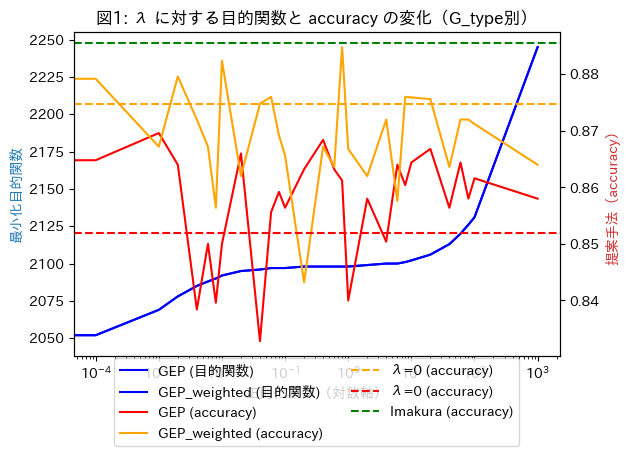

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("mnist_merge.csv")

# フォント設定
plt.rcParams["font.family"] = "IPAexGothic"

# λ列の整理とソート
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 色指定
color_map = {
    "GEP": "red",
    "GEP_weighted": "orange"
}

# 図の作成
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# G_typeごとに色分けして描画
for g_type, group in lambda_df.groupby("G_type"):
    color = color_map.get(g_type, "gray")
    ax1.plot(group["λ"], group["sum_objective_function"], label=f"{g_type} (目的関数)", color="blue", linestyle="-")
    ax2.plot(group["λ"], group["提案手法"], label=f"{g_type} (accuracy)", color=color)

# 横線の追加
ax2.axhline(y=0.8748, color="orange", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.852, color="red", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.8856, color="green", linestyle="--", label="Imakura (accuracy)")

# 軸設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化（G_type別）")

# 凡例統合
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.tight_layout()
plt.show()


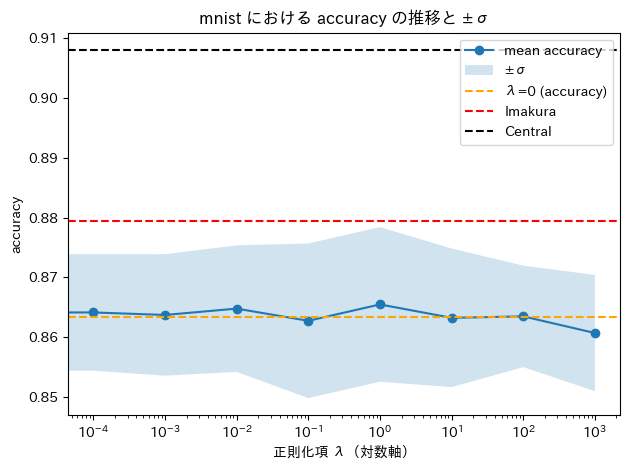

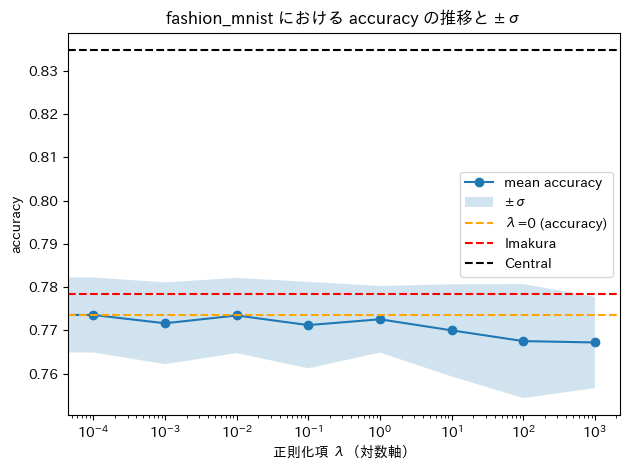

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# データ読み込み
df = pd.read_csv("result_mnist.csv")

# 必要な列があるか確認
columns_needed = ["dataset", "lambda", "metrics_mean", "metrics_stdev"]
assert all(col in df.columns for col in columns_needed), "必要な列が存在しません"

# データセットごとに描画
datasets = ["mnist", "fashion_mnist"]
figs = []

for dataset in datasets:
    df_subset = df[df["dataset"] == dataset].copy()
    df_subset = df_subset.sort_values("lambda")

    x = df_subset["lambda"]
    y = df_subset["metrics_mean"]
    err = df_subset["metrics_stdev"] 
    
    fig, ax = plt.subplots()
    ax.plot(x, y, marker="o", label="mean accuracy")
    ax.fill_between(x, y - err, y + err, alpha=0.2, label="±σ")
    ax.set_xscale("log")
    ax.set_xlabel("正則化項 λ（対数軸）")
    ax.set_ylabel("accuracy")
    ax.set_title(f"{dataset} における accuracy の推移と ±σ")
    if dataset == "mnist":
        ax.axhline(y=0.8634, color="orange", linestyle="--", label="λ=0 (accuracy)")
        ax.axhline(y=0.87948, color="red", linestyle="--", label="Imakura")
        ax.axhline(y=0.908, color="black", linestyle="--", label="Central")
    else:
        ax.axhline(y=0.77351, color="orange", linestyle="--", label="λ=0 (accuracy)")
        ax.axhline(y= 0.77848, color="red", linestyle="--", label="Imakura")
        ax.axhline(y= 0.83478, color="black", linestyle="--", label="Central")
    ax.legend()
    plt.tight_layout()
    figs.append(fig)

plt.show()


C:\Users\sueya\AppData\Local\Temp\ipykernel_24836\3977660707.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="upper left")


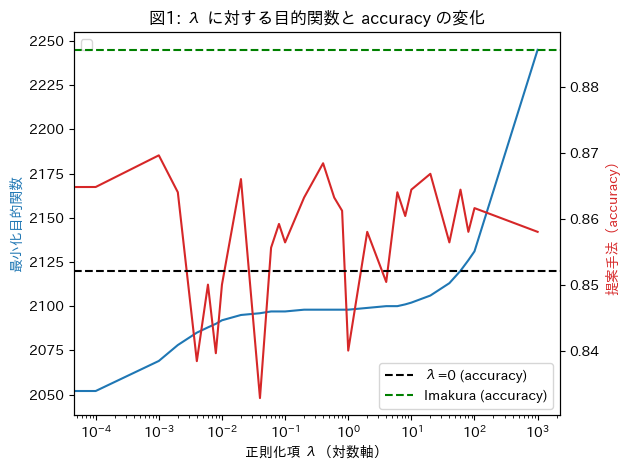

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("output_mnist_lambda.csv")

# 図の日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# lambdaの列名をわかりやすく
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 図1: sum_objective_function（左軸）と 提案手法（右軸）
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], color="tab:red")

# 横線の追加
ax2.axhline(y=0.852, color="black", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.8856, color="green", linestyle="--", label="Imakura (accuracy)")

# 軸の設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化")

# 凡例の追加
ax1.legend(loc="upper left")
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

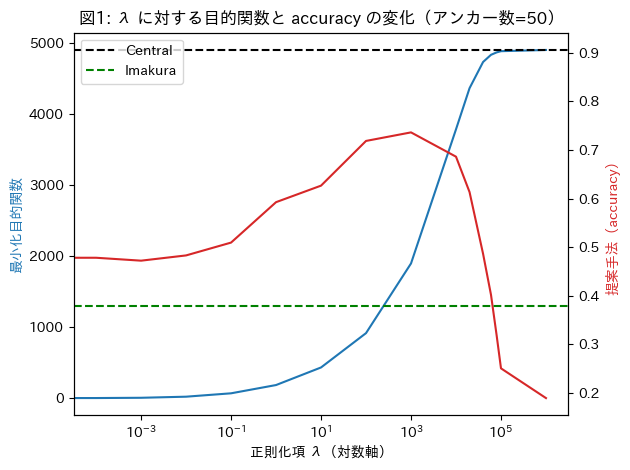

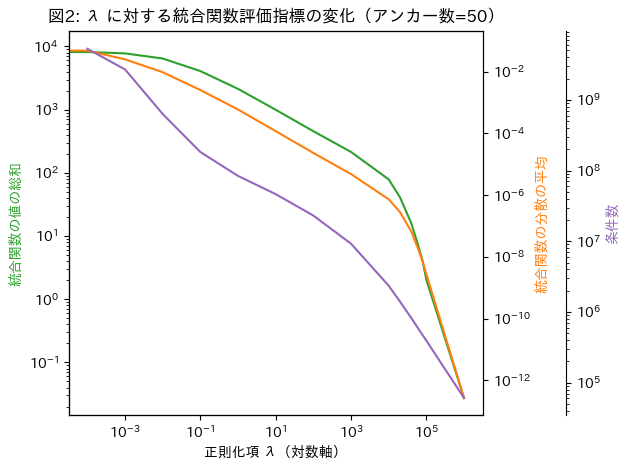

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("output_short_ancker_mnist.csv")

# 図の日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# lambdaの列名をわかりやすく
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 図1: sum_objective_function（左軸）と 提案手法（右軸）
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], color="tab:red")

# 横線の追加
ax2.axhline(y=0.906, color="black", linestyle="--", label="Central")
ax2.axhline(y=0.3796, color="green", linestyle="--", label="Imakura")

# 軸の設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化（アンカー数=50）")

# 凡例の追加
ax2.legend(loc="upper left")
#ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# 3軸目を右側にオフセット
ax3.spines["right"].set_position(("outward", 60))

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["g_abs_sum"], label="統合関数の値の総和", color="tab:green")
ax2.plot(lambda_df["λ"], lambda_df["g_mean_var"], label="統合関数の分散の平均", color="tab:orange")
ax3.plot(lambda_df["λ"], lambda_df["g_condition_number"], label="条件数", color="tab:purple")

# 軸の設定
ax1.set_xscale("log")
ax1.set_yscale("log")  # g_abs_sum を対数軸に
ax2.set_yscale("log")  # g_mean_var を対数軸に
ax3.set_yscale("log") 
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("統合関数の値の総和", color="tab:green")
ax2.set_ylabel("統合関数の分散の平均", color="tab:orange")
ax3.set_ylabel("条件数", color="tab:purple")
ax1.set_title("図2: λ に対する統合関数評価指標の変化（アンカー数=50）")

plt.tight_layout()
plt.show()


C:\Users\sueya\AppData\Local\Temp\ipykernel_24836\106027612.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="upper left")


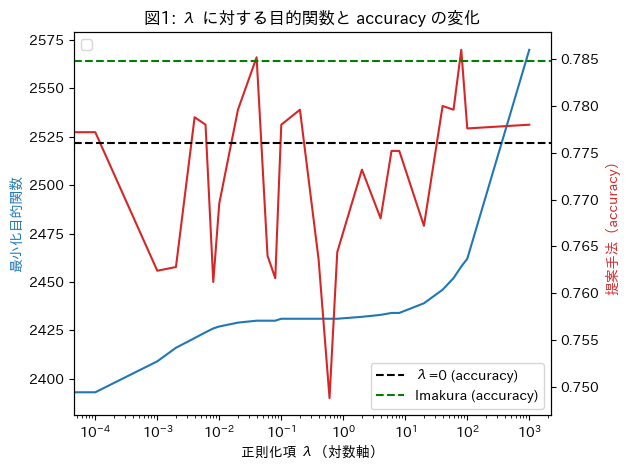

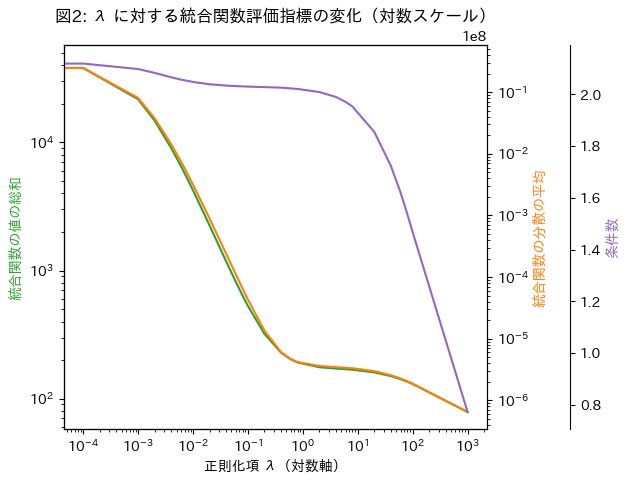

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("output_fashion_lambda.csv")

# 図の日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# lambdaの列名をわかりやすく
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 図1: sum_objective_function（左軸）と 提案手法（右軸）
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], color="tab:red")

# 横線の追加
ax2.axhline(y=0.776, color="black", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.7848, color="green", linestyle="--", label="Imakura (accuracy)")

# 軸の設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化")

# 凡例の追加
ax1.legend(loc="upper left")
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# 3軸目を右側にオフセット
ax3.spines["right"].set_position(("outward", 60))

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["g_abs_sum"], label="統合関数の値の総和", color="tab:green")
ax2.plot(lambda_df["λ"], lambda_df["g_mean_var"], label="統合関数の分散の平均", color="tab:orange")
ax3.plot(lambda_df["λ"], lambda_df["g_condition_number"], label="条件数", color="tab:purple")

# 軸の設定
ax1.set_xscale("log")
ax1.set_yscale("log")  # g_abs_sum を対数軸に
ax2.set_yscale("log")  # g_mean_var を対数軸に
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("統合関数の値の総和", color="tab:green")
ax2.set_ylabel("統合関数の分散の平均", color="tab:orange")
ax3.set_ylabel("条件数", color="tab:purple")
ax1.set_title("図2: λ に対する統合関数評価指標の変化（対数スケール）")

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [ ]:
# ライブラリの再インポート（セッションリセットにより必要）
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# アップロードファイルの再読み込み
file_path = "/mnt/data/output_mnist_lambda.csv"
lambda_df = pd.read_csv(file_path)

# 列名の変更
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})

# 図1の描画
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], label="最小化目的関数", color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], label="提案手法 (accuracy)", color="tab:red")

ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化")

plt.tight_layout()
plt.show()
